A classification if where we try to classify something as one thing or another

Few types:
<li>Binary</li>
<li>Multiclass</li>
<li>Multilabel</li>


In [1]:
#creating data
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
#check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
#lets visualise our data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y}) #all items in first label and second label like that
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


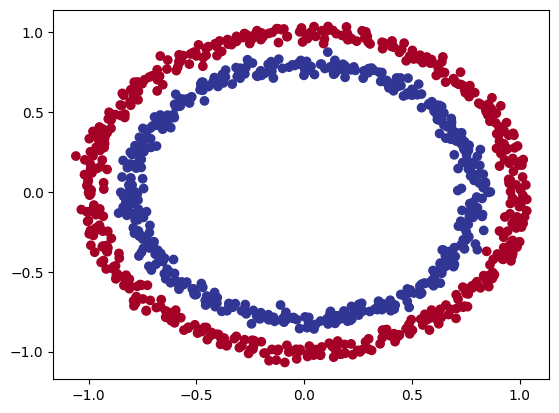

In [5]:
#plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

<h1>Input and Output Shapes</h1>

In [6]:
#check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#how many samples we are working with
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

<h2>Steps in modelling</h2>

In [17]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7758 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.1307 - accuracy: 0.4560
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.9834 - accuracy: 0.4600
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.5471 - accuracy: 0.4740
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 3.7696 - accuracy: 0.4770


In [9]:
#lets try training for longer!
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [10]:
#getting 50 percent accuracy! Not good at all!

In [11]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=200,verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 985us/step - loss: 0.6941 - accuracy: 0.5000


[0.6940587162971497, 0.5]

In [13]:
#we have to improve the model!
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4960


[0.6985675096511841, 0.4959999918937683]

In [15]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.47142765],
       [0.555039  ],
       [0.5596261 ],
       [0.5644844 ],
       [0.4256999 ],
       [0.5685607 ],
       [0.54858726],
       [0.465678  ],
       [0.46719706],
       [0.56723285],
       [0.5089053 ],
       [0.5169435 ],
       [0.55624396],
       [0.4406128 ],
       [0.43397954],
       [0.44794083],
       [0.53743833],
       [0.4511069 ],
       [0.54425704],
       [0.49747968],
       [0.49123764],
       [0.5834241 ],
       [0.44707626],
       [0.474928  ],
       [0.58117294],
       [0.5681966 ],
       [0.54107773],
       [0.44542742],
       [0.44382805],
       [0.43757838],
       [0.46941236],
       [0.57159233],
       [0.54618084],
       [0.4444028 ],
       [0.44700423],
       [0.5871804 ],
       [0.56772894],
       [0.5166279 ],
       [0.44475967],
       [0.4951741 ],
       [0.49323645],
       [0.53428525],
       [0.50543284],
       [0.4400183 ],
       [0.5179444 ],
       [0.53552806],
       [0.43291187],
       [0.533

To visualise our predictions, lets create a function

function name: plot_decision_boundary()

<li>Takes a model, features(X) and labels(y)</li>
<li>Create a meshgrid of the different X values</li>
<li>Make predictions across the meshgrid</li>
<li>PLot the predictions as well a line between zones</li>


In [22]:
import numpy as np

In [27]:
def plot_decision_boundary(model,X,y):
    #creating boundaries
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) #100 evenly spaced values between min and max specified
    
    #create X values (predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()] #concatenates arrays along second axis
    
    #make preds
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass predictions")
        #we have to reshape our prediction for plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot the decision boudnary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    

313/313 [==============================] - 0s 1ms/step
doing binary classification


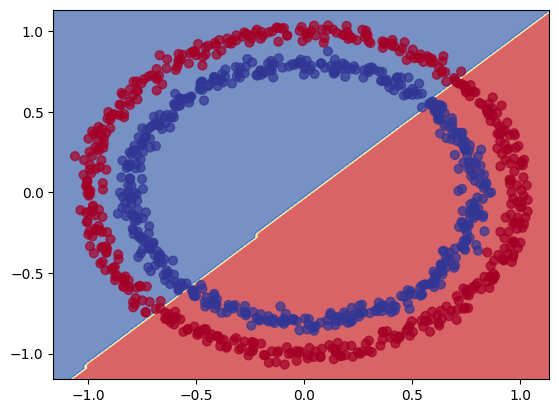

In [29]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)
#DATA IS CIRCULAR BUT BUT WE GET A LINE?!

In [40]:
#LETS USE IT FOR REGRESSION
tf.random.set_seed(42)

#regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y = X + 100

#Spilt for training and test data set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit our data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/onlyaadi/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/onlyaadi/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/onlyaadi/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/onlyaadi/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/onlyaadi/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/onlyaadi/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem, (check losses), but now we need it for regression problem

In [41]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),
            y_reg_train,
            epochs=100)    

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 232.3129 - mae: 232.3129
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 121.8467 - mae: 121.8467
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 49.6670 - mae: 49.6670
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 75.1475 - mae: 75.1475
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 65.2027 - mae: 65.2027
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 44.4375 - mae: 44.4375
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 46.5042 - mae: 46.5042
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 41.6850 - mae: 41.6850
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3159 - mae: 42.3159
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.8535 - mae: 41.8535
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 3ms/step


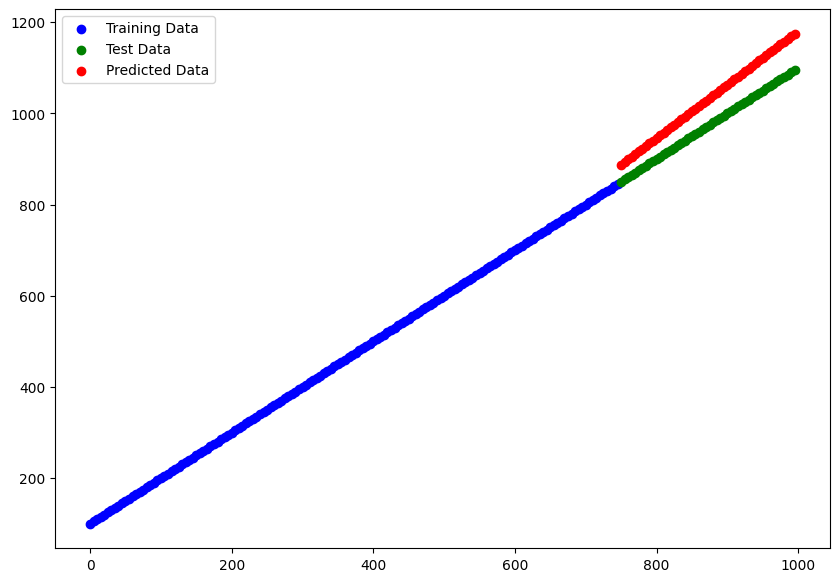

In [42]:
#make preds
y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predictions 
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b",label="Training Data")

plt.scatter(X_reg_test,y_reg_test,c="g",label="Test Data")

plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predicted Data")

plt.legend()

<h1>Non linearity</h1>